<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    # Your code goes here
    result = None
    
    for i in range(len(X)):
        # Умножаем матрицу на вектор
        product = np.dot(X[i], V[i])
        
        # Суммируем результаты
        if result is None:
            result = product
        else:
            result += product
    
    return result

class TestSumProd(unittest.TestCase):
    
    def test_single_matrix_vector(self):
        """Тест с одной матрицей и одним вектором"""
        X = [np.array([[1, 2], [3, 4]])]
        V = [np.array([[1], [2]])]
        
        result = sum_prod(X, V)
        expected = np.array([[5], [11]])
        
        np.testing.assert_array_equal(result, expected)
    
    def test_multiple_matrices_vectors(self):
        """Тест с несколькими матрицами и векторами"""
        X = [
            np.array([[1, 0], [0, 1]]),
            np.array([[2, 0], [0, 2]])
        ]
        V = [
            np.array([[1], [2]]),
            np.array([[3], [4]])
        ]
        
        result = sum_prod(X, V)
        expected = np.array([[7], [10]])
        
        np.testing.assert_array_equal(result, expected)
    
    def test_identity_matrices(self):
        """Тест с единичными матрицами"""
        X = [
            np.eye(2),
            np.eye(2)
        ]
        V = [
            np.array([[1], [2]]),
            np.array([[3], [4]])
        ]
        
        result = sum_prod(X, V)
        expected = np.array([[4], [6]])
        
        np.testing.assert_array_equal(result, expected)

test_suite = unittest.TestLoader().loadTestsFromTestCase(TestSumProd)
unittest.TextTestRunner(verbosity=2).run(test_suite)

test_identity_matrices (__main__.TestSumProd.test_identity_matrices)
Тест с единичными матрицами ... ok
test_multiple_matrices_vectors (__main__.TestSumProd.test_multiple_matrices_vectors)
Тест с несколькими матрицами и векторами ... ok
test_single_matrix_vector (__main__.TestSumProd.test_single_matrix_vector)
Тест с одной матрицей и одним вектором ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.067s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [4]:
def binarize(M, threshold=0.5):
    # Your code goes here
    # Создаем матрицу из нулей как M
    binary_matrix = np.zeros_like(M)
    binary_matrix[M > threshold] = 1
    return binary_matrix

class TestBinarize(unittest.TestCase):
    
    def test_basic_binarization(self):
        """Тест базовой бинаризации"""
        M = np.array([[0.1, 0.6], [0.4, 0.9]])
        result = binarize(M, threshold=0.5)
        expected = np.array([[0, 1], [0, 1]])
        np.testing.assert_array_equal(result, expected)
    
    def test_different_threshold(self):
        """Тест"""
        M = np.array([[0.2, 0.5, 0.8]])
        result = binarize(M, threshold=0.5)
        expected = np.array([[0, 0, 1]])
        np.testing.assert_array_equal(result, expected)
    
    def test_all_zeros(self):
        """Тест когда все элементы меньше порога"""
        M = np.array([[0.1, 0.2, 0.3]])
        result = binarize(M, threshold=0.5)
        expected = np.array([[0, 0, 0]])
        np.testing.assert_array_equal(result, expected)

test_suite = unittest.TestLoader().loadTestsFromTestCase(TestSumProd)
unittest.TextTestRunner(verbosity=2).run(test_suite)

test_identity_matrices (__main__.TestSumProd.test_identity_matrices)
Тест с единичными матрицами ... ok
test_multiple_matrices_vectors (__main__.TestSumProd.test_multiple_matrices_vectors)
Тест с несколькими матрицами и векторами ... ok
test_single_matrix_vector (__main__.TestSumProd.test_single_matrix_vector)
Тест с одной матрицей и одним вектором ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [5]:
def unique_rows(mat):
    # Your code goes here
    result = []
    for i in range(mat.shape[0]):
        unique_elements = np.unique(mat[i, :])
        result.append(unique_elements)
    return result

def unique_columns(mat):
    # Your code goes here
    result = []
    for j in range(mat.shape[1]):
        unique_elements = np.unique(mat[:, j])
        result.append(unique_elements)
    return result

class TestUniqueElements(unittest.TestCase):
    def test_all_unique_elements(self):
        """Тест когда все элементы уникальны"""
        M = np.array([[1, 2, 3], [4, 5, 6]])
        
        rows_result = unique_rows(M)
        cols_result = unique_columns(M)
        
        # Проверяем строки
        for i, row in enumerate(rows_result):
            np.testing.assert_array_equal(row, M[i, :])
        
        # Проверяем столбцы
        for j, col in enumerate(cols_result):
            np.testing.assert_array_equal(col, M[:, j])
    
    def test_all_same_elements(self):
        """Тест когда все элементы одинаковы"""
        M = np.array([[5, 5, 5], [5, 5, 5]])
        
        rows_result = unique_rows(M)
        cols_result = unique_columns(M)

        for row in rows_result:
            np.testing.assert_array_equal(row, [5])

        for col in cols_result:
            np.testing.assert_array_equal(col, [5])

test_suite = unittest.TestLoader().loadTestsFromTestCase(TestUniqueElements)
unittest.TextTestRunner(verbosity=2).run(test_suite)

test_all_same_elements (__main__.TestUniqueElements.test_all_same_elements)
Тест когда все элементы одинаковы ... ok
test_all_unique_elements (__main__.TestUniqueElements.test_all_unique_elements)
Тест когда все элементы уникальны ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.004s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

СГЕНЕРИРОВАННАЯ МАТРИЦА:
[[-0.52842801  0.53239581  1.02275653 -2.12517738]
 [-0.36081065 -0.65599877  0.00676419  0.06207812]
 [ 0.61456859 -0.5954976   0.27002385  0.73898773]
 [-1.09230962 -0.43398745 -1.37234251 -1.06328118]]

СТАТИСТИКА ПО СТРОКАМ:
Строка 0: мат.ожидание = -0.275, дисперсия = 1.456
Строка 1: мат.ожидание = -0.237, дисперсия = 0.085
Строка 2: мат.ожидание = 0.257, дисперсия = 0.272
Строка 3: мат.ожидание = -0.990, дисперсия = 0.118

СТАТИСТИКА ПО СТОЛБЦАМ:
Столбец 0: мат.ожидание = -0.342, дисперсия = 0.378
Столбец 1: мат.ожидание = -0.288, дисперсия = 0.231
Столбец 2: мат.ожидание = -0.018, дисперсия = 0.750
Столбец 3: мат.ожидание = -0.597, дисперсия = 1.193

ГИСТОГРАММЫ ДЛЯ СТРОК:


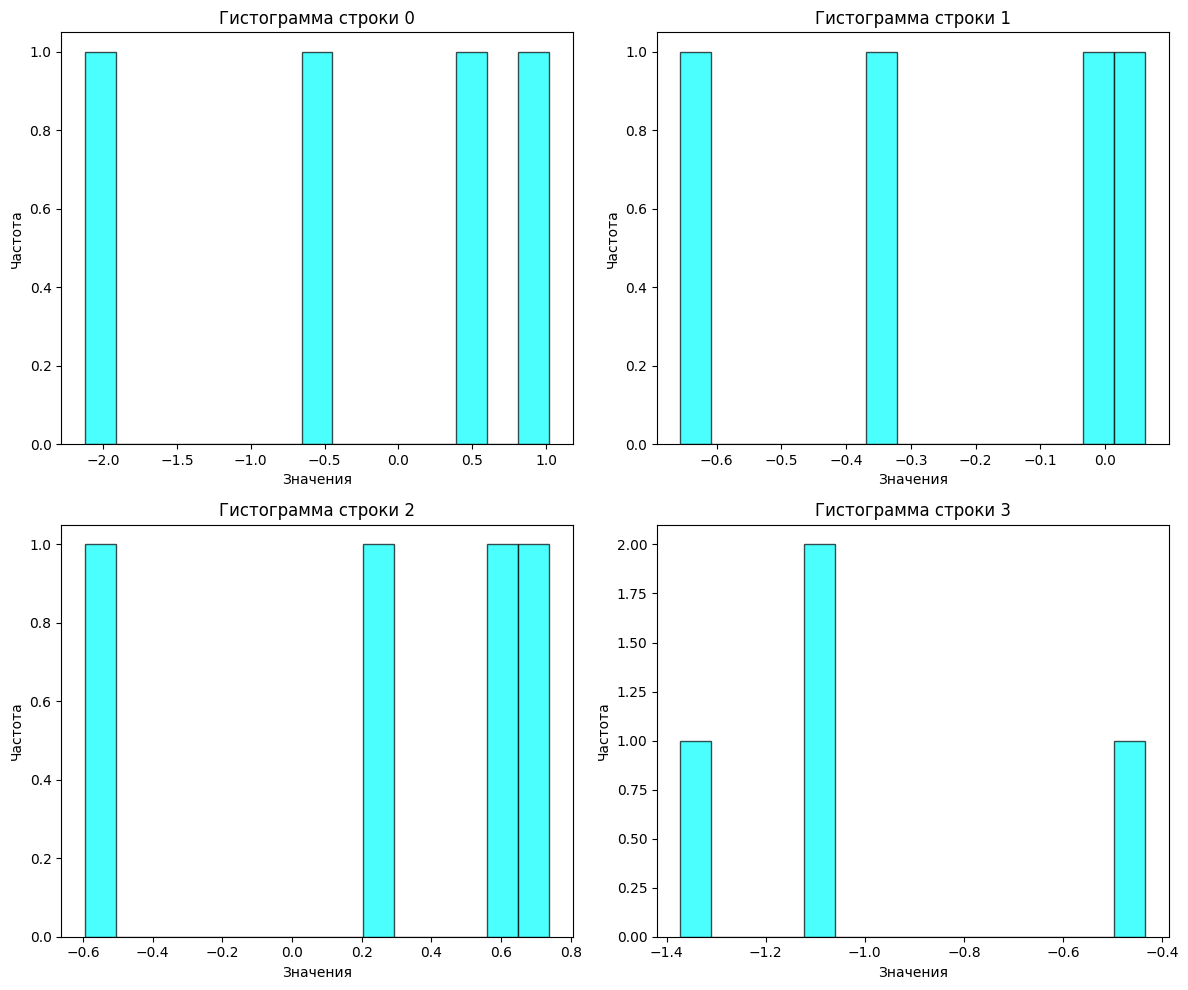

ГИСТОГРАММЫ ДЛЯ СТОЛБЦОВ:


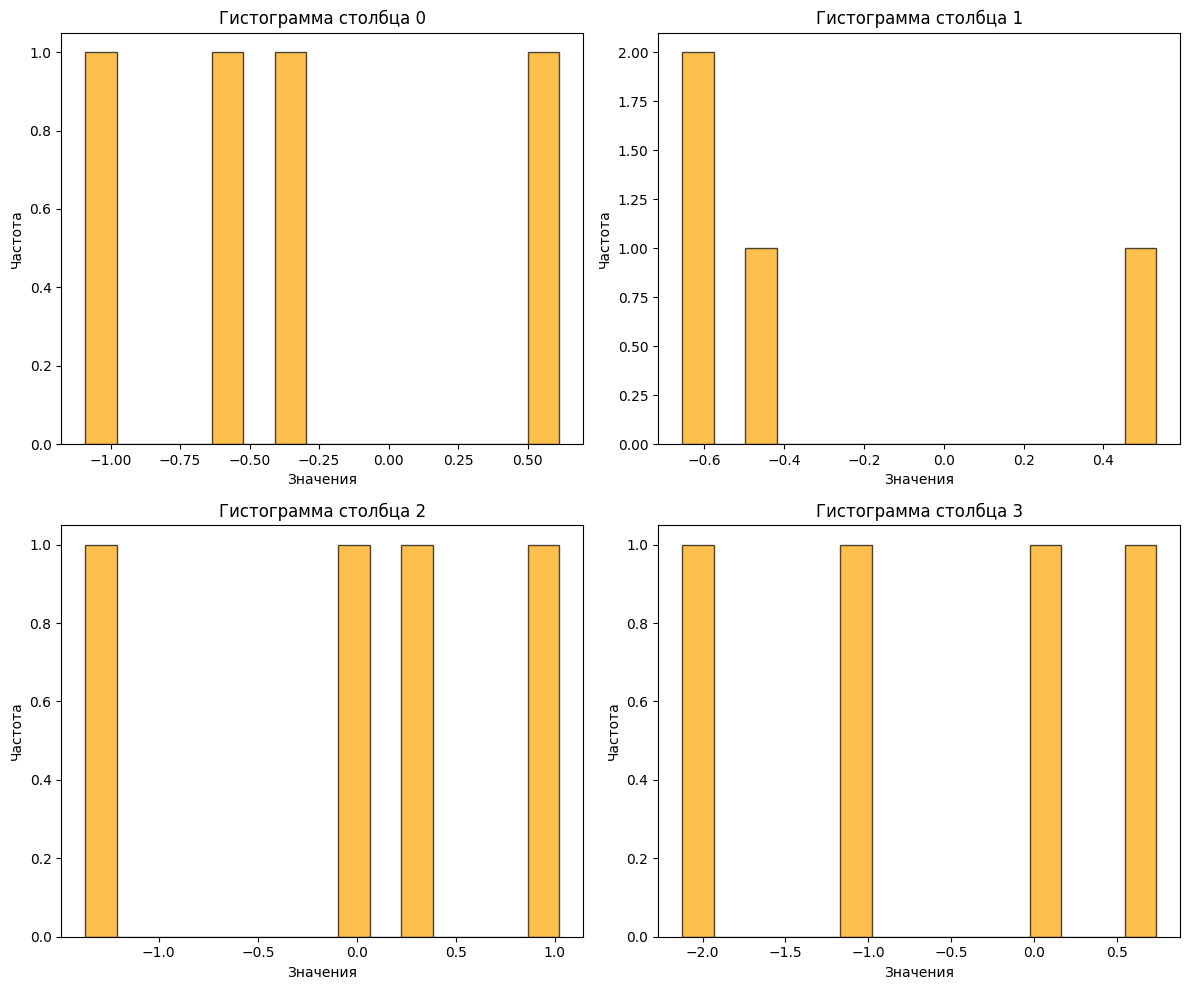

None


In [5]:
# Your code goes here
def analyze_matrix(m, n, mean=0, std=1):
    # Генерируем матрицу случайных чисел
    matrix = np.random.normal(loc=mean, scale=std, size=(m, n))
    
    print("СГЕНЕРИРОВАННАЯ МАТРИЦА:")
    print(matrix)
    print()
    
    # Статистика по строкам
    print("СТАТИСТИКА ПО СТРОКАМ:")
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    
    for i in range(m):
        print(f"Строка {i}: мат.ожидание = {row_means[i]:.3f}, дисперсия = {row_vars[i]:.3f}")
    print()
    
    # Статистика по столбцам
    print("СТАТИСТИКА ПО СТОЛБЦАМ:")
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)
    
    for j in range(n):
        print(f"Столбец {j}: мат.ожидание = {col_means[j]:.3f}, дисперсия = {col_vars[j]:.3f}")
    print()
    
    # гистограммы для строк
    print("ГИСТОГРАММЫ ДЛЯ СТРОК:")
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    
    for i in range(min(m, 4)):
        axes[i].hist(matrix[i, :], bins=15, alpha=0.7, color='cyan', edgecolor='black')
        axes[i].set_title(f'Гистограмма строки {i}')
        axes[i].set_xlabel('Значения')
        axes[i].set_ylabel('Частота')
    # Скрываем пустые subplots если строк меньше 4
    for i in range(m, 4):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
    
    # гистограммы для столбцов
    print("ГИСТОГРАММЫ ДЛЯ СТОЛБЦОВ:")
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    
    for j in range(min(n, 4)):
        axes[j].hist(matrix[:, j], bins=15, alpha=0.7, color='orange', edgecolor='black')
        axes[j].set_title(f'Гистограмма столбца {j}')
        axes[j].set_xlabel('Значения')
        axes[j].set_ylabel('Частота')
    # Скрываем пустые subplots если столбцов меньше 4
    for j in range(n, 4):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

print(analyze_matrix(4,4))

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [25]:
def chess(m, n, a, b):
    # Your code goes here
    matrix = np.zeros((m, n), dtype=type(a))
    
    for i in range(m):
        for j in range(n):
            # Если сумма индексов четная ставим a, иначе b
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    
    return matrix

class TestChess(unittest.TestCase):
    def test_2x2_chessboard(self):
        """Тест доски 2x2"""
        result = chess(2, 2, 0, 1)
        expected = np.array([[0, 1],
                             [1, 0]])
        np.testing.assert_array_equal(result, expected)
    
    def test_3x3_chessboard(self):
        """Тест шахматной доски 3x3"""
        result = chess(3, 3, 'a', 'b')
        expected = np.array([['a', 'b', 'a'],
                             ['b', 'a', 'b'],
                             ['a', 'b', 'a']])
        np.testing.assert_array_equal(result, expected)

test_suite = unittest.TestLoader().loadTestsFromTestCase(TestChess)
unittest.TextTestRunner(verbosity=2).run(test_suite)

test_2x2_chessboard (__main__.TestChess.test_2x2_chessboard)
Тест доски 2x2 ... ok
test_3x3_chessboard (__main__.TestChess.test_3x3_chessboard)
Тест шахматной доски 3x3 ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

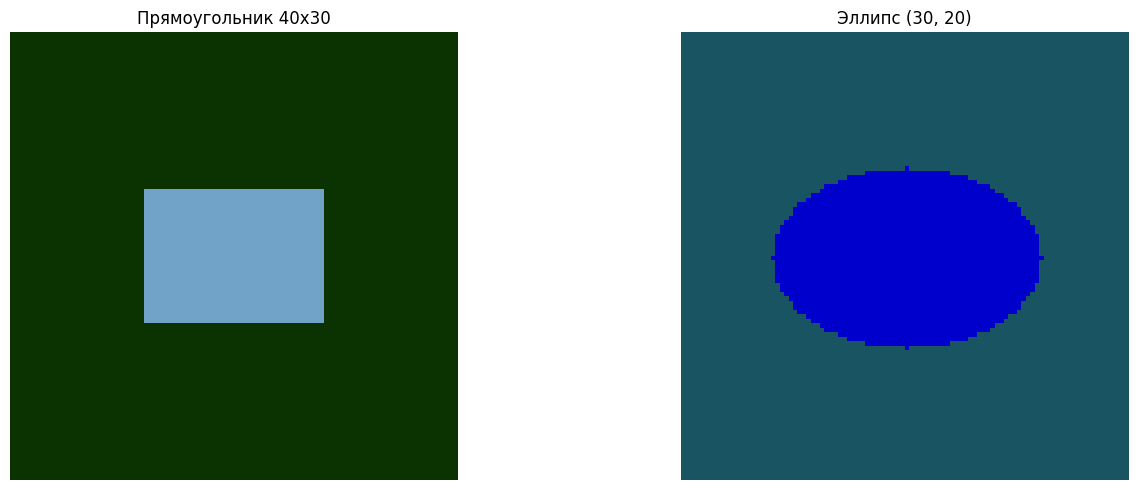

In [ ]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # создаем изображение
    image = np.full((m, n, 3), background_color, dtype=np.uint8)
    
    # вычисляем координаты центра изображения
    center_x, center_y = n // 2, m // 2
    
    # вычисляем границы прямоугольника
    x_start = center_x - a // 2
    x_end = center_x + a // 2
    y_start = center_y - b // 2
    y_end = center_y + b // 2
    
    # прямоугольник не выходит за границы
    x_start = max(0, x_start)
    x_end = min(n, x_end)
    y_start = max(0, y_start)
    y_end = min(m, y_end)

    # закрашиваем прямоугольникек
    image[y_start:y_end, x_start:x_end] = rectangle_color
    
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    # Your code goes here
    image = np.full((m, n, 3), background_color, dtype=np.uint8)
    
    # Координаты центра
    x0, y0 = n // 2, m // 2
    
    # Создаем сетку координат
    y_coords, x_coords = np.ogrid[:m, :n]
    
    # Уравнение эллипса
    ellipse_mask = ((x_coords - x0)**2 / a**2 + (y_coords - y0)**2 / b**2) <= 1
    
    # Закрашиваем эллипсек
    image[ellipse_mask] = ellipse_color
    
    return image

rect_image = draw_rectangle(40, 30, 100, 100, 
                            rectangle_color=(113, 163, 200),
                            background_color=(11, 50, 1))

ellipse_image = draw_ellipse(30, 20, 100, 100,
                            ellipse_color=(0, 0, 205),
                            background_color=(25, 84, 99))

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(rect_image)
axes[0].set_title('Прямоугольник 40x30')
axes[0].axis('off')

axes[1].imshow(ellipse_image)
axes[1].set_title('Эллипс (30, 20)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# тесты к элипсам и прямоугольникам :_)
class TestDrawShapes(unittest.TestCase):
    
    def test_rectangle_size(self):
        """Тест размера прямоугольника"""
        a, b = 4, 3
        m, n = 10, 10
        rect_color = (255, 0, 0)
        bg_color = (0, 0, 0)
        
        image = draw_rectangle(a, b, m, n, rect_color, bg_color)
        
        # Проверяем размер изображения
        self.assertEqual(image.shape, (m, n, 3))
        
        # Проверяем что прямоугольник нарисован (ищем красные пиксели)
        red_pixels = np.all(image == rect_color, axis=2)
        self.assertTrue(np.any(red_pixels))
    
    def test_ellipse_creation(self):
        """Тест создания эллипса"""
        a, b = 4, 3
        m, n = 10, 10
        ellipse_color = (0, 255, 0)
        bg_color = (0, 0, 0)
        
        image = draw_ellipse(a, b, m, n, ellipse_color, bg_color)
        
        # Проверка размера изображения
        self.assertEqual(image.shape, (m, n, 3))
        
        # Проверяем что эллипс нарисован (ищем зеленые пиксели)
        green_pixels = np.all(image == ellipse_color, axis=2)
        self.assertTrue(np.any(green_pixels))

test_suite = unittest.TestLoader().loadTestsFromTestCase(TestDrawShapes)
unittest.TextTestRunner(verbosity=2).run(test_suite)

test_ellipse_creation (__main__.TestDrawShapes.test_ellipse_creation)
Тест создания эллипса ... ok
test_rectangle_size (__main__.TestDrawShapes.test_rectangle_size)
Тест размера прямоугольника ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [81]:
# Your code goes here
def analyze_time_series(series, window_size=3):
    series = np.array(series)

    mean = np.mean(series)                    # Математическое ожидание
    variance = np.var(series)                 # Дисперсия
    std_dev = np.std(series)                  # СКО (Стандартное отклонение)
    
    # Локальные экстремумы
    local_maxima = find_local_extrema(series, 'max')
    local_minima = find_local_extrema(series, 'min')
    
    # Скользящее среднее
    moving_avg = moving_average(series, window_size)
    
    return {
        'series': series,
        'mean': mean,
        'variance': variance,
        'std_dev': std_dev,
        'local_maxima': local_maxima,
        'local_minima': local_minima,
        'moving_average': moving_avg,
        'window_size': window_size
    }

def find_local_extrema(series, extrema_type):
    extrema_indices = []
    
    for i in range(1, len(series) - 1):
        if extrema_type == 'max':
            if series[i] > series[i-1] and series[i] > series[i+1]:
                extrema_indices.append(i)
        else:
            if series[i] < series[i-1] and series[i] < series[i+1]:
                extrema_indices.append(i)
    
    return extrema_indices

def moving_average(series, window_size):
    if window_size > len(series):
        return np.array([])
    
    moving_avg = []
    for i in range(len(series) - window_size + 1):
        window = series[i:i + window_size]
        moving_avg.append(np.mean(window))
    
    return np.array(moving_avg)

In [85]:
# тестовый временной ряд
time_series = [10, 12, 8, 15, 14, 18, 12, 20, 16, 22, 18, 25, 20]

print(f"Ряд: {time_series}")
print()

# Анализируем ряд
results = analyze_time_series(time_series, window_size=3)

# Выводим результаты
print(f"Математическое ожидание (среднее): {results['mean']:.2f}")
print(f"Дисперсия: {results['variance']:.2f}")
print(f"СКО (стандартное отклонение): {results['std_dev']:.2f}")
print()

print(f"Локальные максимумы (индексы): {results['local_maxima']}")
print(f"Локальные минимумы (индексы): {results['local_minima']}")
print()

print("скользящее среднее, окно = 3:")
print(f"Исходный ряд: {time_series}")
print(f"Скользящее среднее: {results['moving_average']}")

Ряд: [10, 12, 8, 15, 14, 18, 12, 20, 16, 22, 18, 25, 20]

Математическое ожидание (среднее): 16.15
Дисперсия: 22.59
СКО (стандартное отклонение): 4.75

Локальные максимумы (индексы): [1, 3, 5, 7, 9, 11]
Локальные минимумы (индексы): [2, 4, 6, 8, 10]

скользящее среднее, окно = 3:
Исходный ряд: [10, 12, 8, 15, 14, 18, 12, 20, 16, 22, 18, 25, 20]
Скользящее среднее: [10.         11.66666667 12.33333333 15.66666667 14.66666667 16.66666667
 16.         19.33333333 18.66666667 21.66666667 21.        ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [4]:
# Your code goes here
def one_hot_encoding(labels):
    labels = np.array(labels)
    
    # Находим количество уникальных классов
    n_classes = np.max(labels) + 1
    
    # Создаем матрицу нулей
    n_samples = len(labels)
    one_hot_matrix = np.zeros((n_samples, n_classes))
    
    # Заполняем единицами
    for i, label in enumerate(labels):
        one_hot_matrix[i, label] = 1
    
    return one_hot_matrix
print(one_hot_encoding([0, 2, 1, 0]))

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
